# **Sales Prediction**

# (Simple Regression Model)

# Problem Statement

Build a model which predicts sales based on the money spent on different platforms for marketing.

Sales prediction using Python can be accomplished through various machine learning techniques. Here, I'll outline a basic approach using linear regression as an example. Keep in mind that more advanced techniques might provide better results, depending on your data and specific requirements

### Data
Use the advertising dataset given and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

**Reading and understanding the Dataset**

In [6]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# **EDA**

# Data insights

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualisation

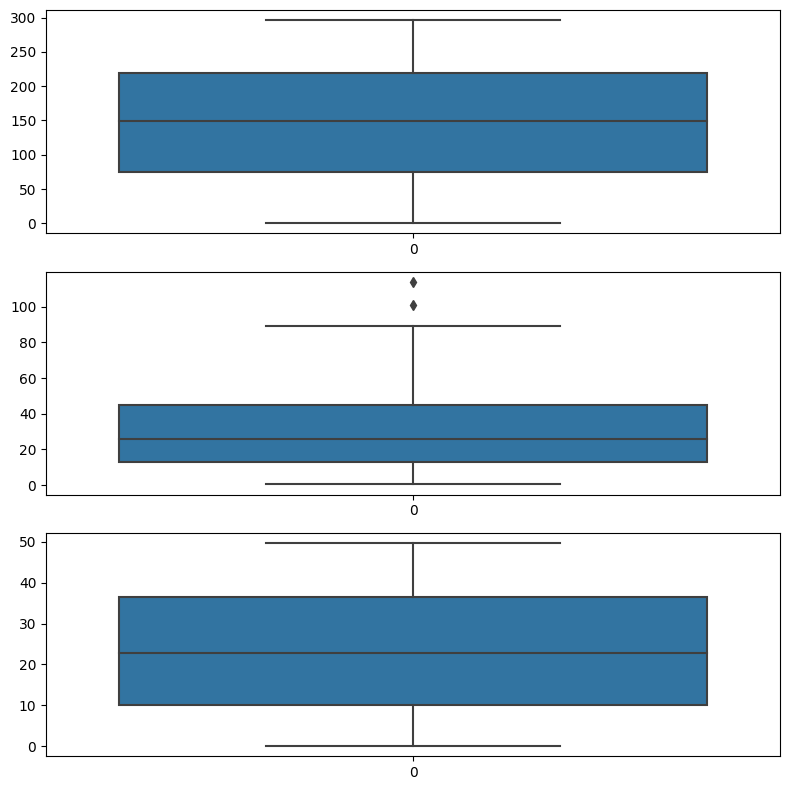

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (8,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

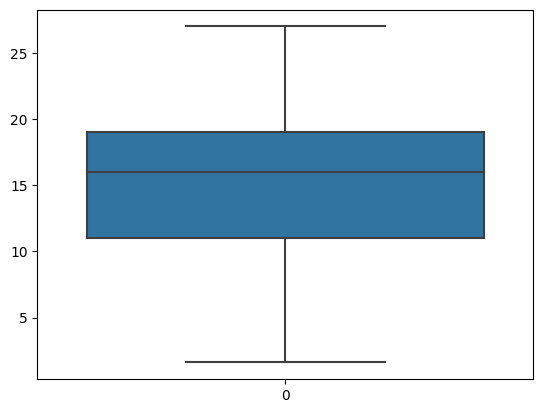

In [ ]:
sns.boxplot(df['Sales'])
plt.show()

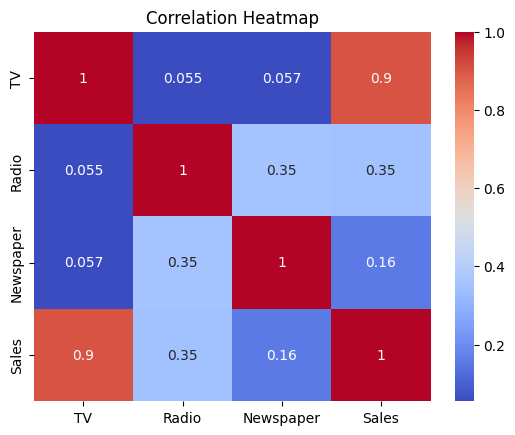

In [ ]:
# Let's see the correlation between different variables.
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Obseravtion : We can clearly see that the TV is heavily co-related with sales with a corelation value of 90%, radio with 35% and newspaper with just 16%.

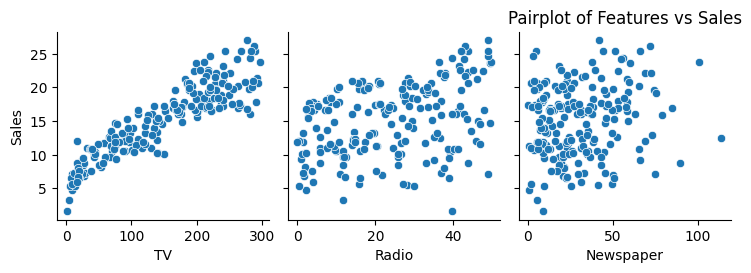

In [ ]:
# Pairplot (Scatter plot matrix)
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.title('Pairplot of Features vs Sales')
plt.show()

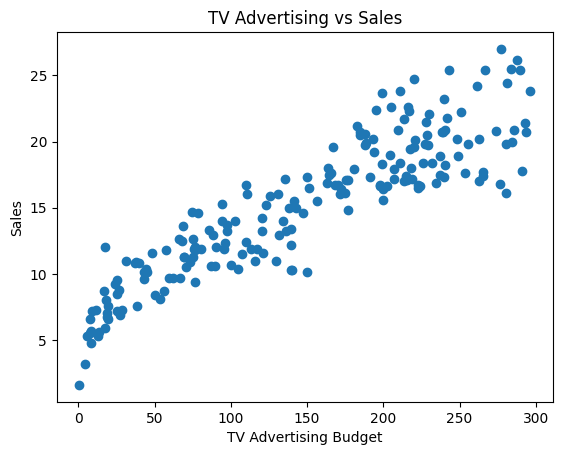

In [ ]:
# Scatter plot of TV vs Sales
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()

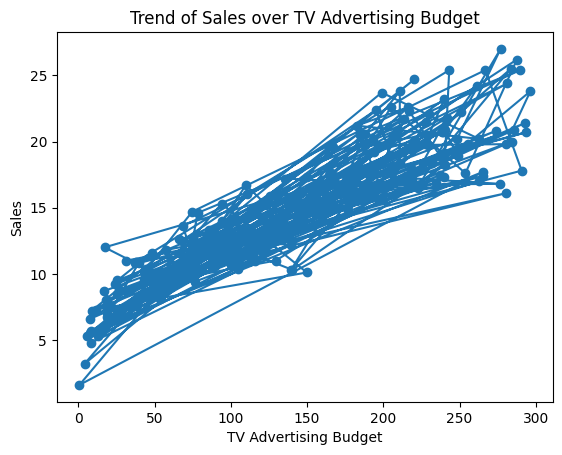

In [ ]:
# Line plot showing trend of Sales over TV budget
plt.plot(df['TV'], df['Sales'], marker='o')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Trend of Sales over TV Advertising Budget')
plt.show()


# **Data Preprocessing**

Let us perform Simple linear regression

In [19]:
X = df.drop(columns="Sales")
y = df["Sales"]

In [20]:
X.shape

(200, 3)

In [21]:
y.shape

(200,)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# **Baseline Model(Simple Linear Regression)**

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)




Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
Mean Absolute Error: 1.2748262109549338
R-squared: 0.9059011844150826


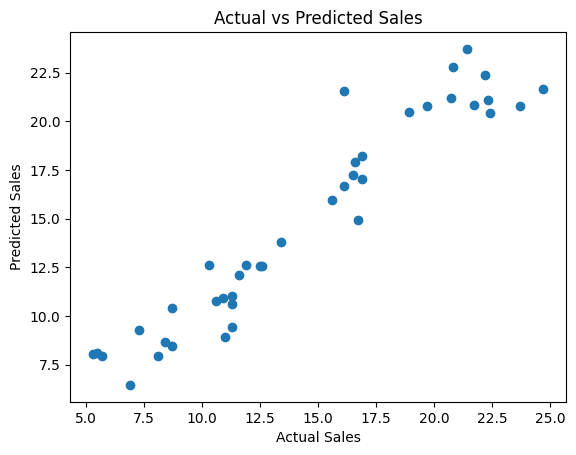

In [24]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

#**2.Decision Tree Regression Model**

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Decision Tree Regressor
model2 = DecisionTreeRegressor()

# Hyperparameter tuning
param_grid = {'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(model2, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best Decision Tree Regressor model with the best parameters
best_model_2 = grid_search.best_estimator_

# Fit the best model on the training data
best_model_2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_2 = best_model_2.predict(X_test)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_2)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_2)
print("Mean Absolute Error:", mae)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred_2)
print("R-squared:", r2)


Mean Squared Error: 3.148181832227104
Root Mean Squared Error: 1.7743116502540088
Mean Absolute Error: 1.230093253968254
R-squared: 0.8981207195786848


# **3.Random Forest Regression Model**

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Random Forest Regressor
model3 = RandomForestRegressor()

# Hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(model3, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best Random Forest Regressor model with the best parameters
best_model_3 = grid_search.best_estimator_

# Fit the best model on the training data
best_model_3.fit(X_train, y_train)

# Make predictions on the test data
y_pred_3 = best_model_3.predict(X_test)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_3)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_3)
print("Mean Absolute Error:", mae)

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred_3)
print("R-squared:", r2)


Mean Squared Error: 1.424693208333327
Root Mean Squared Error: 1.1936051308256541
Mean Absolute Error: 0.9218249999999977
R-squared: 0.9538950649545379


# **Model Comparison**

| Model                | RMSE                | MAE                 |     R-squared       |
|----------------------|---------------------|---------------------|---------------------|
| Linear Regression    | 1.705214  | 1.274826  | 0.905901  |
| Decision Tree        | 1.774311  | 1.230093 | 0.898120  |
| Random Forest        | 1.1936051 | 0.921824  | 0.953895 |

#**Summary**

Based on the evaluation metrics, the Random Forest model outperforms the other models in terms of RMSE, MAE, and R-squared. It achieved the lowest RMSE and MAE values, indicating better predictive accuracy. The high R-squared value suggests that a significant portion of the variance in the target variable is explained by the model. While the Decision Tree model also performed well, the Random Forest model demonstrates superior performance and generalization capability.

The Random Forest model is recommended for this project due to its strong predictive performance and ability to handle complex relationships within the data.
